## Data Anlaysis on Relationship between Gold_per_minute and Experience_per_minute And the Game result in Dota 2


### 1. Project description

DOTA 2 is one of the most popular multiplayer online battle arena(MOBA) game. In this game, two teams of five players, with each team occupying and defending their own separate base on the map. A team wins by being the first to destroy the other team's "Ancient", which is a large structure located within their base. Each of the ten players independently controls a powerful hero which selected from a pool of heroes. Heroes accumulate experience and gold to grow stronger and gain new abilities in order to destroy the opponent's Ancient. Where experience increases one or more basic stats of heroes, Strength, Agility, and Intelligence . Where gold are used to buy items, which give heroes additional stats values. Some gears also offers special skills or effects. The damage in this game is calculated based on the stats values. Therefore, the gold gained per minute(GPM) and experience gained per minute(XPM) are important values that reflects the players' performance. In this data analysis project, the relationship between the game result (win/loss) and the GPM,XPM values are explored. For simplicity, the teams' sum GPM,XPM values are used.

In [6]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# scikit-learn library
from sklearn.preprocessing import PolynomialFeatures

# scientific computing library
from scipy.optimize import minimize

# remove warning
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

### 2. Data acquisition
Each game is around 20 to 40 minutes!, and each game generate 30MB raw data in average. To collect those data, an API from Valve's Dota server is necessary. So in this project data was collected by using a open source program - d2api wrapper (https://github.com/whoophee/d2api), which allows user easily access Valve's Dota 2 WebAPI. To access Valve server we need register Steam Web API Key form (https://steamcommunity.com/dev/apikey)

In [1]:
import d2api
from d2api.src import entities

api = d2api.APIWrapper('2C9D2BF5AF9F3C6E8F845C60414F8288')


Each match has a unique match ID, which allow us to access match detail by using the API.
The following code is used for collecting match id from dota server, due to the API limitation, each API request only returns the latest 100 match id from the server and there is API request limit. Thus, run this code in a interval to collect more match id.

In [ ]:
# match_history = api.get_match_history()
# print(match_history)
# ID_from_API=[]

# for match in match_history['matches']:
#     #append_id=np.append(ID_from_API,match['match_id'])
#     ID_from_API.append(match['match_id'])
# #print(ID_from_API)
# f = open("ID.txt")
# IDs=np.loadtxt(f)
# new_id=[]
# for id in ID_from_API:
#     if id not in IDs:
#         new_id.append(id)

# merged_id= np.append(IDs,np.asarray(new_id))
# np.savetxt("ID.txt",merged_id,fmt='%d')
# f.close()

The next step is to obtain match details from dota server, using the match id obtained from the previous step,. the 'get_match_details' api returns a structure which consists of key information from a match. Then from this structure we select those data needed for the project. And save the data into a txt file for storing. 

In [ ]:
#print(api.get_match_details(5279515602))
# f = open("ID.txt")
# match_id=np.array(list(np.loadtxt(f))).astype(int)
# f.close()
# match_id=match_id[:,None]
# #print(match_id)

# GPM_XPM =np.zeros([len(match_id),30])

# print(len(match_id))

# for i in range(len(match_id)):
#     details=api.get_match_details(match_id[i])
    
#     GPM_XPM[i][0]=details["match_id"]
    
#     if details["winner"]=="dire":
#         GPM_XPM[i][15]=2
#     elif details["winner"]=="radiant":
#         GPM_XPM[i][15]=1
    
#     r =1
#     d =17
#     for player in details["players"]:
#         if player["side"]=="radiant":
#             GPM_XPM[i][r]=player["gold_per_min"]
#             GPM_XPM[i][r+7]=player["xp_per_min"]
#             GPM_XPM[i][6]+=player["gold_per_min"]
#             GPM_XPM[i][13]+=player["xp_per_min"]
#             r+=1
#         elif player["side"]=="dire":
#             GPM_XPM[i][d]=player["gold_per_min"]
#             GPM_XPM[i][d+7]=player["xp_per_min"]
#             GPM_XPM[i][22]+=player["gold_per_min"]
#             GPM_XPM[i][29]+=player["xp_per_min"]
#             d+=1
        
# #print(GPM_XPM.astype(int)[:3])
# np.savetxt("GMP_XMP.txt",GPM_XPM,fmt='%d')

### 3. Data exploration and cleaning


#### 3.1 Exploration
Using scatter plot to visualize the data collected. As the result shown, there are some outlier data point in the plot. Mainly due to the match did not played by two full teams. Hence, those data point shall be removed.


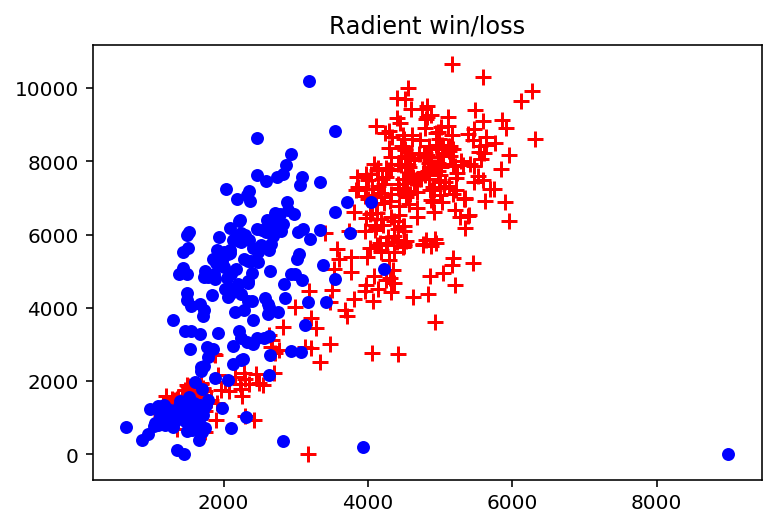

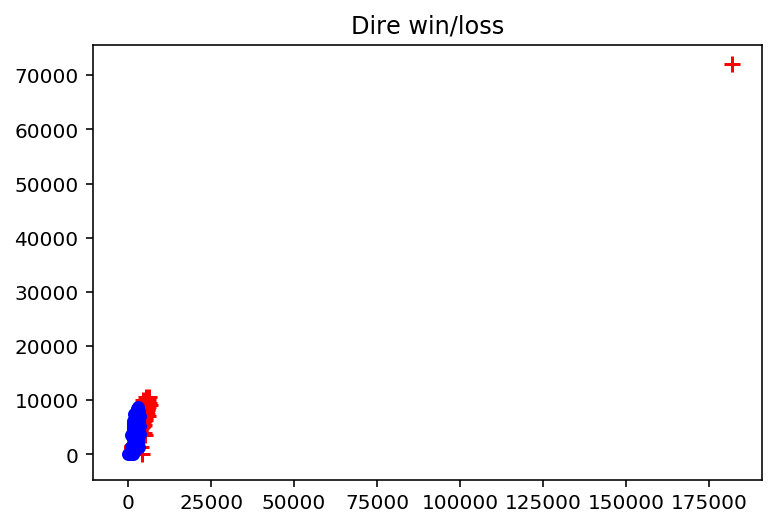

In [7]:
data = np.loadtxt('GMP_XMP.txt', delimiter=' ',dtype='int64')

n=data.shape[0]
#print(data.shape)
#print(data.astype(int))

#print(reduced_data.astype(int))
#np.savetxt("reduced_data_0.txt",reduced_data,fmt='%d') 
import matplotlib.pyplot as plt

x1 = data[:,6] # feature 1
x2 = data[:,13] # feature 2
idx_class0 = (data[:,15]==1) # index of class0
idx_class1 = (data[:,15]==2) # index of class1
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Rad win') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Rad loss')
plt.title("Radient win/loss")

plt.show()

x1 = data[:,22] # feature 1
x2 = data[:,29] # feature 2
idx_class0 = (data[:,15]==2) # index of class0
idx_class1 = (data[:,15]==1) # index of class1
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Dire win') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Dire loss')
plt.title("Dire win/loss")

plt.show()
  

#### 3.2 Data cleaning


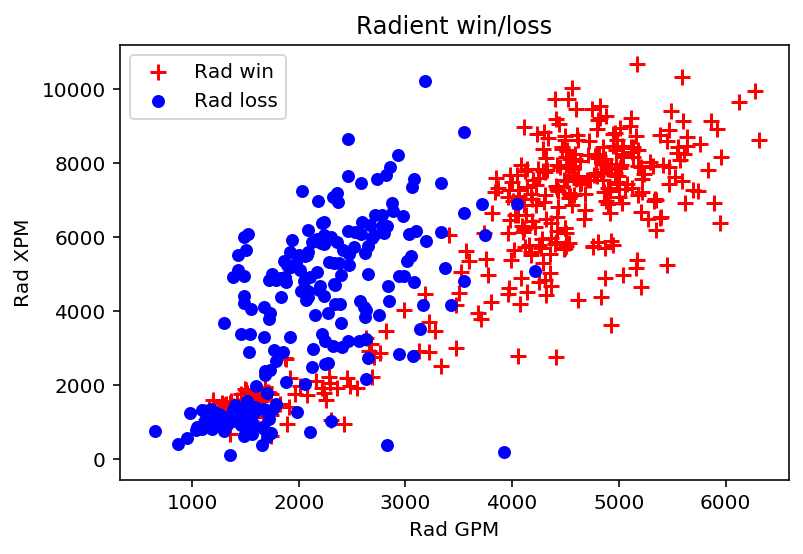

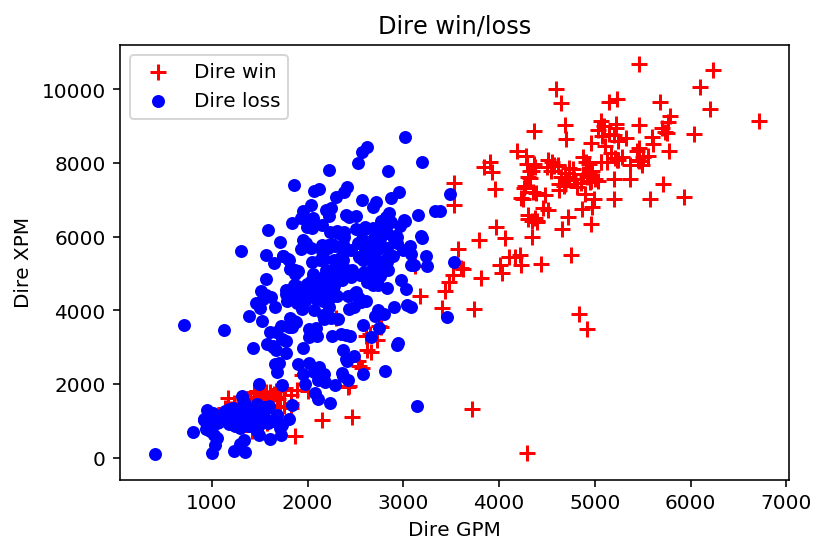

In [8]:
# Remove matches that has player abandoned the play
count=0;
zero_row=[]
for row in data:
    if(row[6]==0 or row[13]==0 or row[22]==0 or row[29]==0):
        zero_row.append(count)
        count-=1
    count+=1

for row in zero_row:
    data=np.delete(data,row,0)

x1 = data[:,6] # feature 1
x2 = data[:,13] # feature 2
idx_class0 = (data[:,15]==1) # index of class0
idx_class1 = (data[:,15]==2) # index of class1
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Rad win') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Rad loss')
plt.title("Radient win/loss")
plt.xlabel('Rad GPM')
plt.ylabel('Rad XPM')
plt.legend()
plt.show()

x1 = data[:,22] # feature 1
x2 = data[:,29] # feature 2
idx_class0 = (data[:,15]==2) # index of class0
idx_class1 = (data[:,15]==1) # index of class1
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Dire win') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Dire loss')
plt.title("Dire win/loss")
plt.xlabel('Dire GPM')
plt.ylabel('Dire XPM')
plt.legend()
plt.show()
#np.savetxt("reduced_data_1.txt",reduced_data,fmt='%d') 

### 4. Pre-processing


#### 4.1 Construct the data matrix to the desired form
Rad and Dire are the names of the two competing teams in one game. As the game conditions are identical to both team, the data is merged. 

602
(1204, 3)
[[2106  725    0]
 [3719 1329    1]
 [1743  711    0]
 [1642 1121    1]
 [1249 1102    1]]


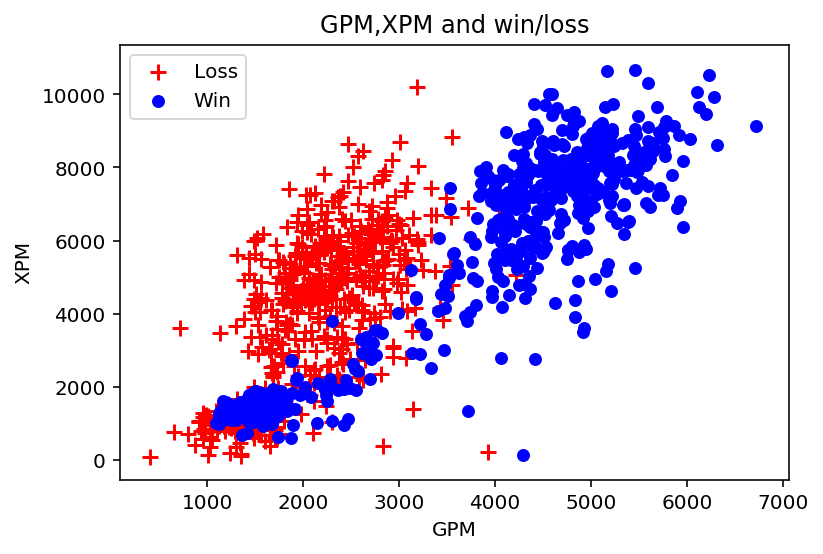

In [9]:
n=data.shape[0]
reduced_data = np.zeros([n,5])
reduced_data[:,0] = data[:,6]
reduced_data[:,1] = data[:,13]
reduced_data[:,2] = data[:,22]
reduced_data[:,3] = data[:,29]
reduced_data[:,4] = data[:,15]

data1=reduced_data

n=data1.shape[0]
print(n)
X= np.zeros([2*n,3]) # target data matrix X: row 0 GPM, row 1 XPM, row 2 result 1=win 0 =loss
print(X.shape)

for i in range(0,n):
    X[2*i,0] = data1[i,0]
    X[2*i,1] = data1[i,1]
    X[2*i+1,0] = data1[i,2]
    X[2*i+1,1] = data1[i,3]
    if (data1[i,4] == 1):
        X[2*i,2] = 1
        X[2*i+1,2] = 0
    else:
        X[2*i,2] = 0
        X[2*i+1,2] = 1
            
print(X[:5,:].astype(int))

x1 = X[:,0] # feature 1
x2 = X[:,1] # feature 2
idx_class0 = (X[:,2]==0) # index of class0
idx_class1 = (X[:,2]==1) # index of class1
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Loss') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Win')
plt.title('GPM,XPM and win/loss')
plt.xlabel('GPM')
plt.ylabel('XPM')
plt.legend()
plt.show()

#### 4.2 Z- scoring

mean before= [2939.82142857 4731.92358804]
std before= [1427.98893757 2666.64927041]
mean after= [ 1.24669562e-16 -6.82362989e-17]
std after= [1. 1.]


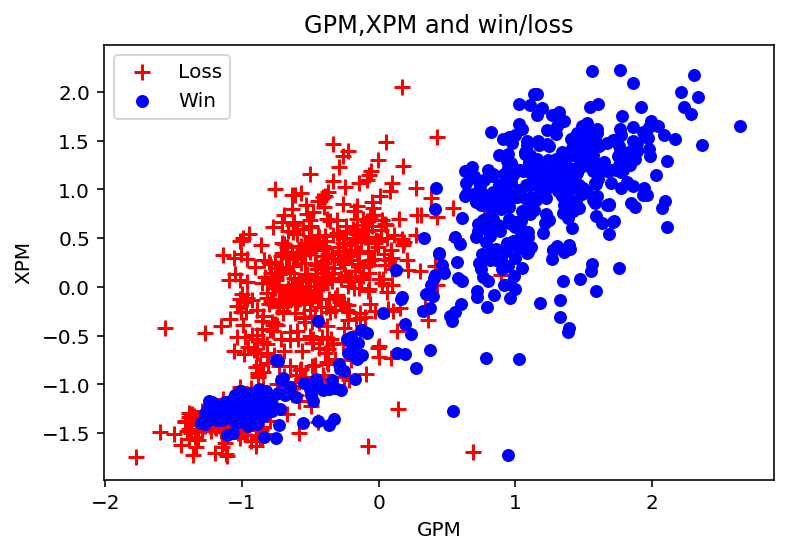

In [10]:
z=X[:,:2]
print('mean before=',np.mean(z,axis=0))
print('std before=',np.std(z,axis=0))

z = z-np.mean(z,axis=0)
z = z/np.std(z,axis=0)
n=X.shape[0]
data = np.zeros([n,3])

data[:,:2]=z
data[:,2]=X[:,2]
#print(data[:5])

print('mean after=',np.mean(z,axis=0))
print('std after=',np.std(z,axis=0))


x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx_class0 = (data[:,2]==0) # index of class0
idx_class1 = (data[:,2]==1) # index of class1
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Loss') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Win')
plt.title('GPM,XPM and win/loss')
plt.xlabel('GPM')
plt.ylabel('XPM')
plt.legend()
plt.show()

X=data
#np.savetxt("processed_data_1.txt",X,fmt='%d') 

### 5. Apply learning techniques

#### 5.1 Define functions

In [11]:
# sigmoid function
def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z)) 
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(X.dot(w)) 
    return p


# loss function definition
def loss_logreg(w,X,y,reg): 
    n = len(y)
    y_pred = sigmoid(X.dot(w)) 
    loss = -1/n* ( y.T.dot(np.log(y_pred+1e-10)) + (1-y).T.dot(np.log(1-y_pred+1e-10)) ) 
    d = w.shape[0]
    loss += reg/d * w.T.dot(w)
    return loss


def plot_classes(data,title,cpt_fig):
    
    # plot
    x1 = data[:,0] # feature 1
    x2 = data[:,1] # feature 2
    idx_class0 = (data[:,2]==0) # index of class0
    idx_class1 = (data[:,2]==1) # index of class1

    plt.figure(cpt_fig,figsize=(6,6))
    plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Loose') 
    plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Win')
    plt.title(title)
    plt.legend()
    plt.xlabel('GPM')
    plt.ylabel('XPM')
    plt.show()
    
    
def compute_w_solution(X,y,reg):
    initial_w = np.zeros((X.shape[1],1))
    result = minimize(loss_logreg, initial_w, args=(X,y,reg), method='Powell', options={'maxiter':500})
    w_solution = np.array(result.x)[:,None]
    loss_solution = loss_logreg(w_solution,X,y,reg)
    return w_solution, loss_solution
    
    
def plot_decision_boundary(X,w,data,title,cpt_fig):

    # compute values p(x) for multiple data points x
    x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
    x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid

    n_mesh = xx1.reshape(-1).shape[0]
    mesh_data = np.zeros((n_mesh,2))
    mesh_data[:,0] = xx1.reshape(-1)
    mesh_data[:,1] = xx2.reshape(-1)
    mesh_X = poly.fit_transform(mesh_data)

    p = f_pred(mesh_X,w)
    p = p.reshape(xx1.shape)

    # plot
    x1 = data[:,0] # feature 1
    x2 = data[:,1] # feature 2
    idx_class0 = (data[:,2]==0) # index of class0
    idx_class1 = (data[:,2]==1) # index of class1
    plt.figure(cpt_fig,figsize=(6,6))
    plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Loss') 
    plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Win')
    plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
    plt.legend()
    plt.xlabel('GPM')
    plt.ylabel('XPM')
    plt.title(title)
    plt.show()
    
    
# error
def compute_error(X,w,y):
    
    # continuous predictive function of the classes
    pred = f_pred(X,w)
    
    # discrete predictive function of the classes
    y_pred = (pred >= 0.5).astype('int').squeeze()

    # accuracy
    y = y.squeeze()
    diff = (y_pred == y).astype('int')
    accuracy = 100* sum(diff)/ y.shape[0]
    
    return 100-accuracy

####  5.2 Analysis on regression compacity(d)


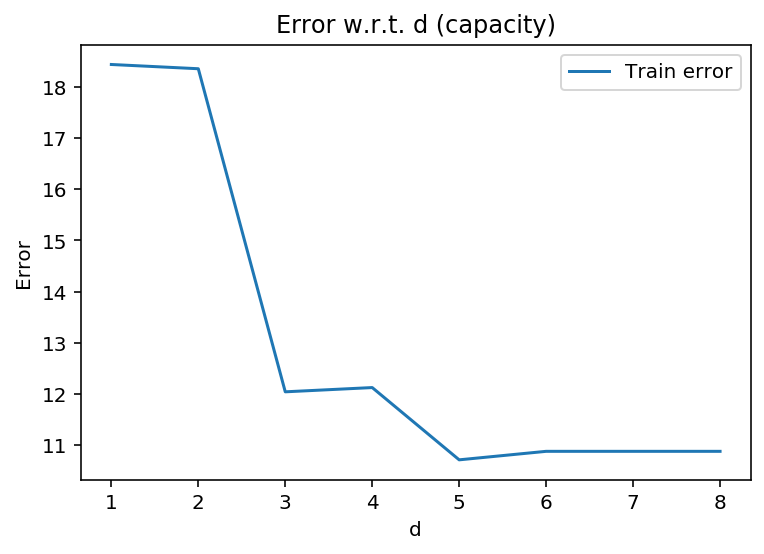

[18.43853821 18.35548173 12.04318937 12.12624585 10.71428571 10.88039867
 10.88039867 10.88039867]


In [12]:
list_d = list(range(1,9))

train_error_tab = np.zeros(len(list_d))

# data label
train_y = X[:,2][:,None] 

for i,d in enumerate(list_d):
    
    poly = PolynomialFeatures(d)
    
    train_X = poly.fit_transform(X[:,0:2])
    train_w_solution, train_loss_solution = compute_w_solution(train_X,train_y,0)
    train_error = compute_error(train_X,train_w_solution,train_y)
    train_error_tab[i] = train_error
    
# plot
x = list_d
plt.figure(1)
plt.plot(x, train_error_tab,label='Train error'.format(i=1))
plt.legend(loc='best')
plt.title('Error w.r.t. d (capacity)')
plt.xlabel('d')
plt.ylabel('Error')
plt.show()

print(train_error_tab)

#### 5.3 Supervised classification with d=5
As seen above, d=5 gives the minimum error

train loss= 0.22441832414398438
train error= 10.714285714285708


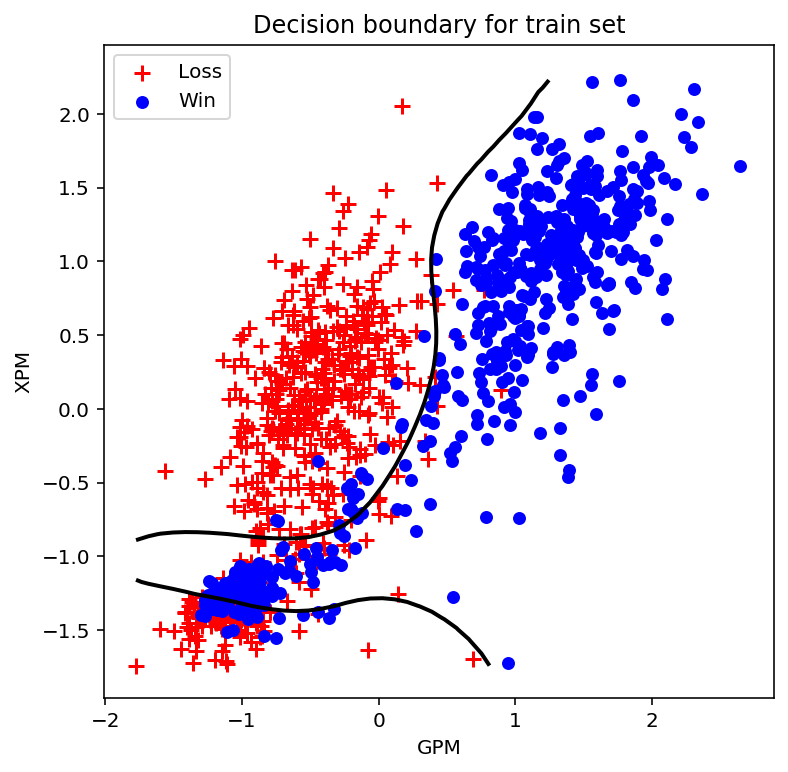

In [13]:
# data features
d = 5
poly = PolynomialFeatures(d)
train_X = poly.fit_transform(X[:,0:2])
#print(train_X.shape)

# compute solution w
reg = 0
train_w_solution, train_loss_solution = compute_w_solution(train_X,train_y,reg)
print('train loss=',train_loss_solution[0][0])

# compute accuracy
print('train error=',compute_error(train_X,train_w_solution,train_y))

# plot decision boundary
plot_decision_boundary(train_X,train_w_solution,X,'Decision boundary for train set',1)

#print(train_w_solution)

#### 5.4 Import & process validation data
The validation data set is a new set of data obtained with the api tool. The same data cleaning and processing methods are applied.

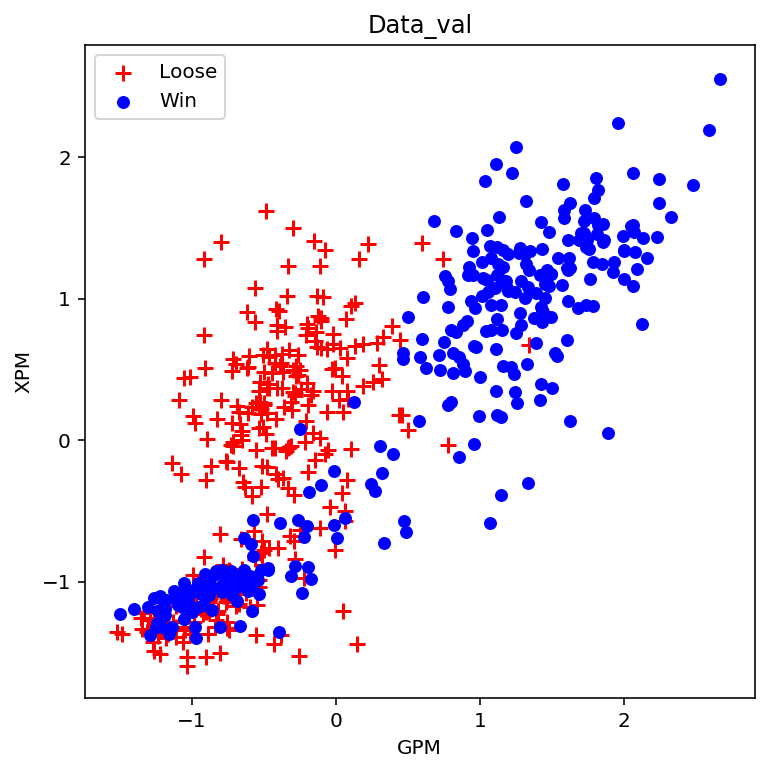

In [14]:
data = np.loadtxt('GMP_XMP_val.txt', delimiter=' ',dtype='int64')

n=data.shape[0]
#print(data.shape)
#print(data.astype(int))

reduced_data = np.zeros([n,5])
reduced_data[:,0] = data[:,6]
reduced_data[:,1] = data[:,13]
reduced_data[:,2] = data[:,22]
reduced_data[:,3] = data[:,29]
reduced_data[:,4] = data[:,15]
#print(reduced_data_val[:4,:].astype(int))

count=0;
zero_row=[]
for row in reduced_data:
    if(row[0]==0 or row[1]==0 or row[2]==0 or row[3]==0):
        zero_row.append(count)
        count-=1
    count+=1

for row in zero_row:
    reduced_data=np.delete(reduced_data,row,0)
    
#print(reduced_data[:4,:].astype(int))    

#center data
z=reduced_data[:,:4]
#print('mean before=',np.mean(z,axis=0).astype(int))

z = z-np.mean(z,axis=0)
z = z/np.std(z,axis=0)
n=reduced_data.shape[0]
data = np.zeros([n,5])

data[:,:4]=z
data[:,4]=reduced_data[:,4]
#print(data[:4,:].astype(int))


X_val= np.zeros([2*n,3]) # target data matrix X: row 0 GPM, row 1 XPM, row 2 result 1=win 0 =loss
#print(X_val.shape)

for i in range(0,n):
    X_val[2*i,0] = data[i,0]
    X_val[2*i,1] = data[i,1]
    X_val[2*i+1,0] = data[i,2]
    X_val[2*i+1,1] = data[i,3]
    if (data[i,4] == 1):
        X_val[2*i,2] = 1
        X_val[2*i+1,2] = 0
    else:
        X_val[2*i,2] = 0
        X_val[2*i+1,2] = 1
        
plot_classes(X_val,'Data_val',1)

#### 5.5 Analysis on d with validation data

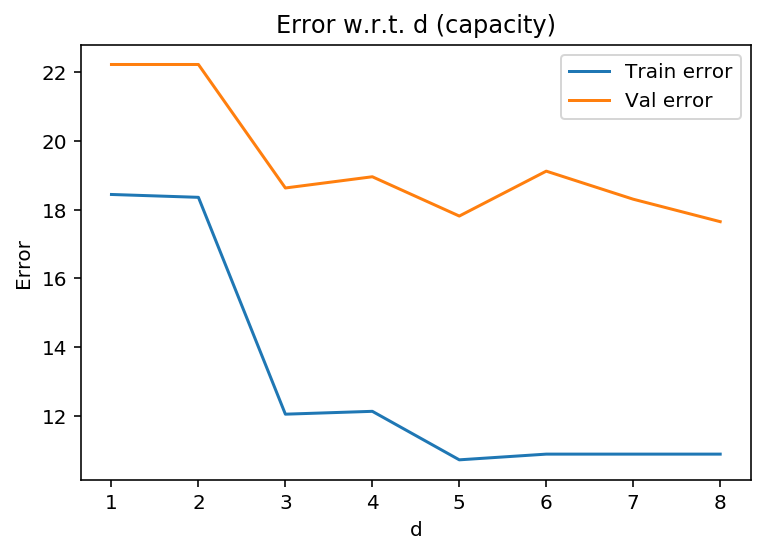

[22.22222222 22.22222222 18.62745098 18.95424837 17.81045752 19.11764706
 18.30065359 17.64705882]
[18.43853821 18.35548173 12.04318937 12.12624585 10.71428571 10.88039867
 10.88039867 10.88039867]


In [15]:
# List of values of the polynomial degree d
list_d = list(range(1,9))

val_y = X_val[:,2][:,None] 

train_error_tab = np.zeros(len(list_d))
val_error_tab = np.zeros(len(list_d))

for i,d in enumerate(list_d):
    
    poly = PolynomialFeatures(d)
    
    train_X = poly.fit_transform(X[:,0:2])
    train_w_solution, train_loss_solution = compute_w_solution(train_X,train_y,0)
    train_error = compute_error(train_X,train_w_solution,train_y)
    train_error_tab[i] = train_error
    
    val_X = poly.fit_transform(X_val[:,0:2])
    val_error = compute_error(val_X,train_w_solution,val_y)
    val_error_tab[i] = val_error

    
# plot
x = list_d
plt.figure(1)
plt.plot(x, train_error_tab,label='Train error'.format(i=1))
plt.plot(x, val_error_tab,label='Val error'.format(i=2))
plt.legend(loc='best')
plt.title('Error w.r.t. d (capacity)')
plt.xlabel('d')
plt.ylabel('Error')
plt.show()

print(val_error_tab)
print(train_error_tab)

#### 5.6 Analysis on regularization factor with validation data
As shown above, d = 5 works for the validation data as well. Thus, d =5 is used for determining the regularization factor

[1e-06, 1e-05, 1e-04, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]


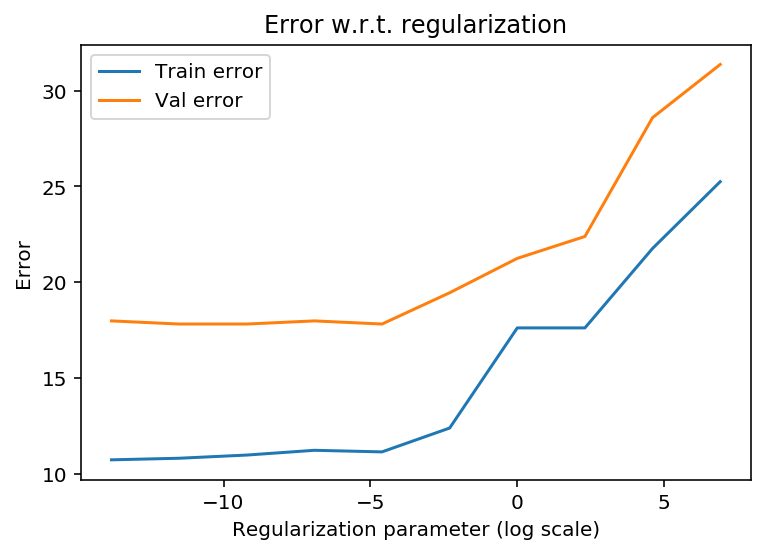

[17.97385621 17.81045752 17.81045752 17.97385621 17.81045752 19.44444444
 21.24183007 22.38562092 28.59477124 31.37254902]
[10.71428571 10.79734219 10.96345515 11.21262458 11.12956811 12.37541528
 17.60797342 17.60797342 21.76079734 25.24916944]


In [16]:
# List of values of the regularization parameter λ
reg = np.array(range(-6,4),np.float32)
reg = 10**reg
list_reg = list(reg)
print(list_reg)

d = 5
poly = PolynomialFeatures(d)

train_error_tab = np.zeros(len(list_reg))
val_error_tab = np.zeros(len(list_reg))

for i,reg in enumerate(list_reg):
    
    train_X = poly.fit_transform(X[:,0:2])
    train_w_solution, train_loss_solution = compute_w_solution(train_X,train_y,reg)
    train_error = compute_error(train_X,train_w_solution,train_y)
    train_error_tab[i] = train_error
    
    val_X = poly.fit_transform(X_val[:,0:2])
    val_error = compute_error(val_X,train_w_solution,val_y)
    val_error_tab[i] = val_error

    
# plot
x = np.log(list_reg)
plt.figure(1)
plt.plot(x, train_error_tab,label='Train error'.format(i=1))
plt.plot(x, val_error_tab,label='Val error'.format(i=2))
plt.legend(loc='best')
plt.title('Error w.r.t. regularization')
plt.xlabel('Regularization parameter (log scale)')
plt.ylabel('Error')
plt.show()

print(val_error_tab)
print(train_error_tab)

#### 5.7 Supervised classification result
The final result is obtained with d=5 and reg=0.01

train error= 11.129568106312291


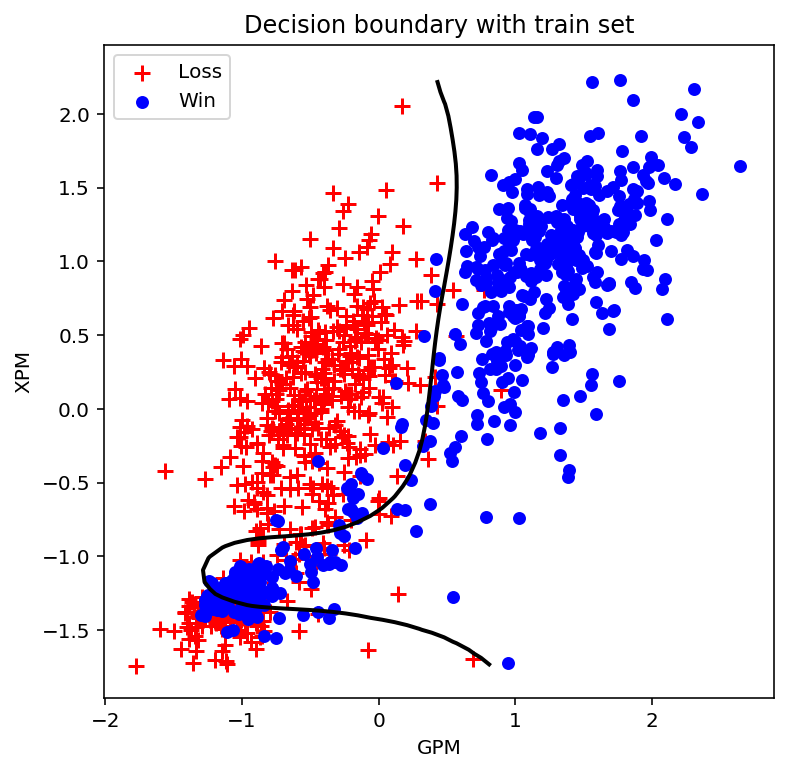

validation error= 17.810457516339866


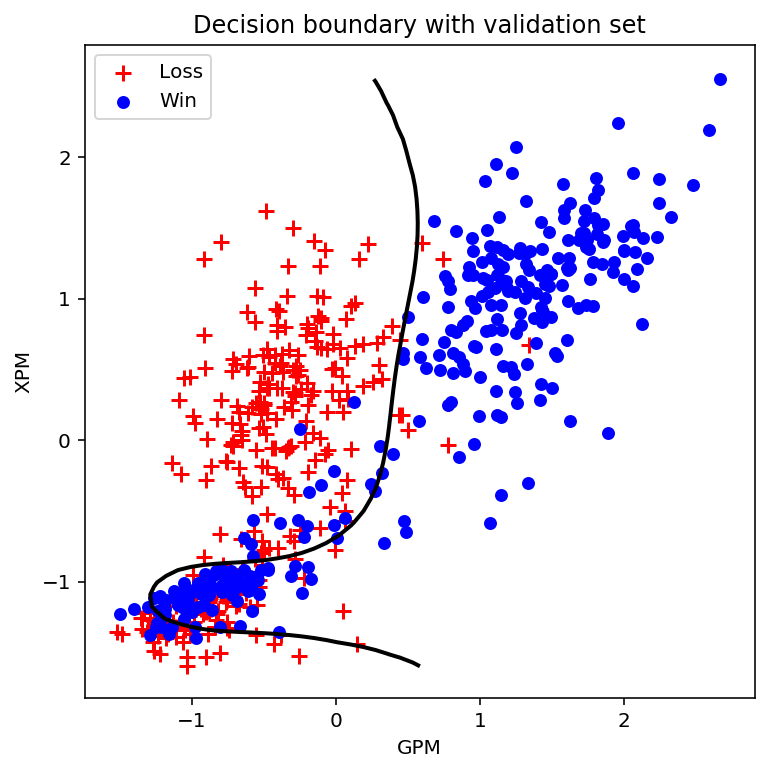

In [17]:
# data features
d = 5
poly = PolynomialFeatures(d)
train_X = poly.fit_transform(X[:,0:2])
#print(train_X.shape)

# data label
train_y = X[:,2][:,None] 

# compute solution w
reg = 0.01
train_w_solution, train_loss_solution = compute_w_solution(train_X,train_y,reg)

# compute accuracy
print('train error=',compute_error(train_X,train_w_solution,train_y))

# plot decision boundary
plot_decision_boundary(train_X,train_w_solution,X,'Decision boundary with train set',1)

# plot validation data with decision boundary
val_X = poly.fit_transform(X_val[:,0:2])
val_y = X_val[:,2][:,None] 

print('validation error=',compute_error(val_X,train_w_solution,val_y))
plot_decision_boundary(val_X,train_w_solution,X_val,'Decision boundary with validation set',1)


### 6. Conclusion

1. Both XPM and GPM are positively related to winning. i.e. a team with high XPM and GPM is likely to win.
2. GPM has more effect over XPM. i.e., a team with low XPM but high GPM is more likely to win comparing to a team with high XPM but low   GPM.

#### Limitations: 
1. Dota is a game has very steep learning curve, players capability various very much
2. Frequent game balance update and game content update
3. Group of five players vs. five random players form a group
4. Game played duration, as game last too long, all heroes are able to max out the level

#### Possibel improvements:
1. Use multiple sets of data for training and validation. Increase data volume.
2. Include more data features.
3. Seperate the case where heros max out the level.